# **SMS and Email Spam Classifier**



In [ ]:
# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Data reading with read_csv function
data = pd.read_csv('/content/drive/MyDrive/Docs for collab/Spam /spam.csv',encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.rename(columns={'v1':'Type','v2':'Content'},inplace=True)

In [ ]:
# Getting quick info
df = data[['Type','Content']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Type     5572 non-null   object
 1   Content  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# viewing first 5 data points
df.head()

,Type,Content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Checking null values
df.isnull().sum()

Type       0
Content    0
dtype: int64

In [ ]:
# Description of dataset
df.describe()

,Type,Content
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


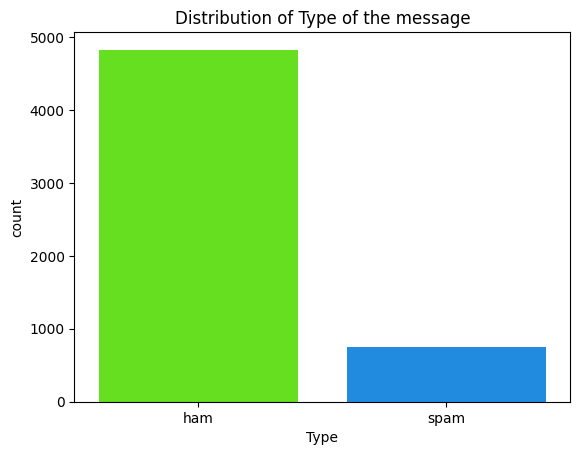

In [ ]:
# Distribution of type of messages
ax = sns.countplot(x='Type',data=df,palette='gist_rainbow').set(title='Distribution of Type of the message')
plt.show()


In [ ]:
# Percentage of Spam and Ham
ham = (df.Type.value_counts()[0]/5572)*100
spam = (df.Type.value_counts()[1]/5572)*100
print(f'Percentage of Ham in this dataset {ham.round(2)}%')
print(f'Percentage of Spam in this dataset {spam.round(2)}%')

Percentage of Ham in this dataset 86.59%
Percentage of Spam in this dataset 13.41%


<p>It Shows it's clearly imbalanced Data</p>

In [ ]:
# Length of the Content
df['Content Length'] = df['Content'].apply(len)
df.head()

,Type,Content,Content Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


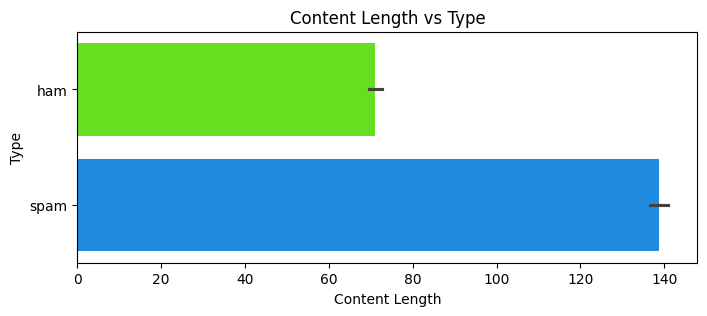

In [ ]:
# Content Length vs Type
figsize = (8, 3)
plt.figure(figsize=figsize)
sns.barplot(df, x='Content Length', y='Type', palette='gist_rainbow').set(title='Content Length vs Type')
plt.show()

From Above plot we can see **spam** messages are high in length compared to **ham** messages

# **Text Preprocessing**

In [ ]:
# Encoding of Type Column
le = LabelEncoder()
le.fit(df['Type'])
df['Encoded Type'] = le.transform(df['Type'])

In [ ]:
# spliting the data
X = df['Content']
y = df['Encoded Type']

In [ ]:
# Vectorization on description column using Tf idf Vectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(X)
x_vector = x.toarray()

In [ ]:
# DataFrame after Vectorization
pd.DataFrame(data=x_vector,columns=vectorizer.get_feature_names_out()).head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Train Test split
X_train,X_test,y_train,y_test = train_test_split(x_vector,y,test_size=0.2,random_state=0)
X_train.shape

(4457, 8672)

# **Model Building**

## **1) Naive Bayes**

In [ ]:
model_MNB = MultinomialNB()
model_MNB.fit(X_train,y_train)
print('Training set Score :',model_MNB.score(X_train,y_train))
print('Test set Score :',model_MNB.score(X_test,y_test))

Training set Score : 0.9699349338119811
Test set Score : 0.9488789237668162


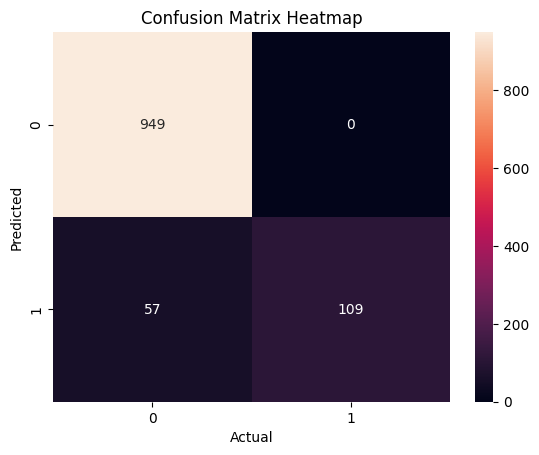

In [ ]:
# Confusion Matrix
y_pred = model_MNB.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# Classification Report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       949
           1       1.00      0.66      0.79       166

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.95      0.95      0.94      1115



## **2) Logistic Regression**

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
print('Training set Score :',model_lr.score(X_train,y_train))
print('Test set Score :',model_lr.score(X_test,y_test))


Training set Score : 0.9741978909580435
Test set Score : 0.9533632286995516


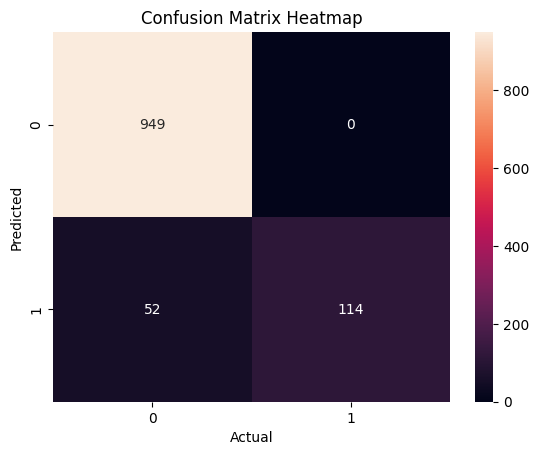

In [ ]:
# Confusion Matrix
y_pred = model_lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# Classification Report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       949
           1       1.00      0.66      0.79       166

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.95      0.95      0.94      1115



## **3) SVM**

In [ ]:
model_svm = SVC()
model_svm.fit(X_train,y_train)
print('Training set Score :',model_svm.score(X_train,y_train))
print('Test set Score :',model_svm.score(X_test,y_test))

Training set Score : 0.9973076060130133
Test set Score : 0.968609865470852


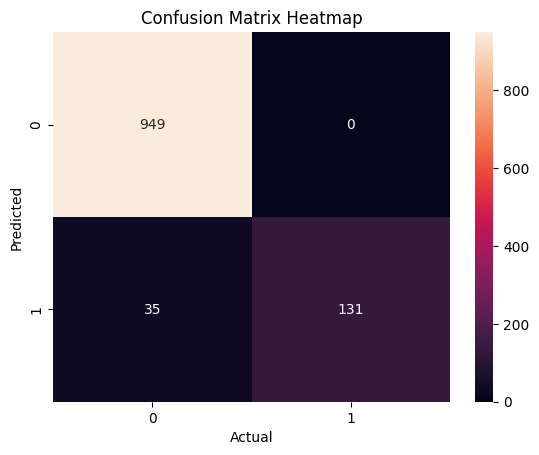

In [ ]:
# Confusion Matrix
y_pred = model_svm.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# Classification Report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       949
           1       1.00      0.69      0.81       166

    accuracy                           0.95      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.95      0.95      1115



# **Result**

Support Vector Machine gives the better accuracy compared to other algorithms we used.

So we can use SVM as our model for the prediction.

# **Prediction**

In [ ]:
text = ['Bored housewives! Chat n date now! 0871750.77.11! BT-national rate 10p/min only from landlines!',
        'Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur Soul Ur Guide And U Will Never loose in world....gnun - Sent via WAY2SMS.COM']
# Actual ===> text = [1(spam),0(ham)]

In [ ]:
test = vectorizer.transform(text)
test_dense = test.toarray()

In [ ]:
# MultinomialNB
model_MNB.predict(test_dense)

array([1, 0])

In [ ]:
# Logistic Regression
model_lr.predict(test_dense)

array([1, 0])

In [ ]:
# SVM
model_svm.predict(test_dense)

array([1, 0])